In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import matplotlib

In [102]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rc('font', family='Lato', size=16)

## All-powerful finite difference calculator

Write a code which computes a finite difference approximation of $u^{(k)}(x)$ based on the values of $\{u(x \pm nh)\}_{n=-N}^{M}$. Use the Vandermonde's system.

### The stencil

Firstly we define the known points (*stencil*).

In [3]:
N = 0
M = 2 * np.pi

In [4]:
h = np.pi / 4

In [5]:
stencil = np.arange(N, M, h)

In [6]:
y = lambda x : np.sin(x)

We also plot those points

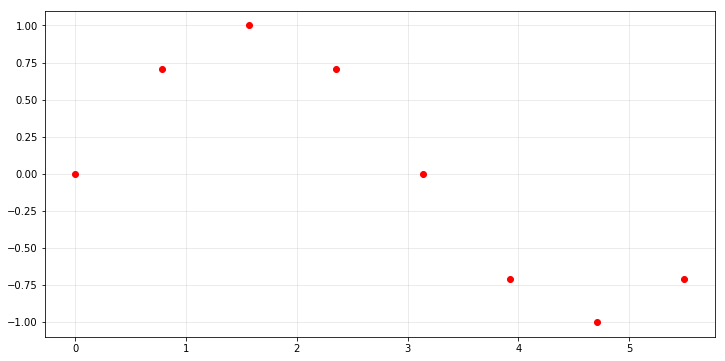

In [7]:
plt.plot(stencil, y(stencil), 'ro')
plt.grid(alpha=0.3)
plt.show()

Let's set the order of derivative:

In [8]:
k = 3

And the point for which we want to know the value of function

In [9]:
x = 1

We will also calculate the value of the $k$-th derivative at this point to see if our method is good enough

In [10]:
-np.cos(x)

-0.5403023058681398

We then generate the derivatives vector (zeros with one at $k$-th position).

In [11]:
b = np.zeros(8)
b[k] = 1
b

array([0., 0., 0., 1., 0., 0., 0., 0.])

We generate the necessary Vandermonde's matrix and display it.

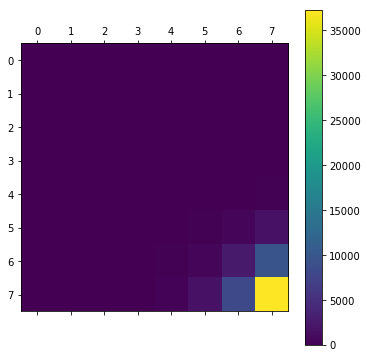

In [12]:
V = np.vander(stencil - x, len(stencil), increasing=True)
plt.matshow(V)
plt.colorbar()
plt.show()

We also have to scale each row of the matrix by the inverse of factorial

In [14]:
factors = scipy.special.factorial(np.arange(len(stencil - x)))
factors

array([1.00e+00, 1.00e+00, 2.00e+00, 6.00e+00, 2.40e+01, 1.20e+02,
       7.20e+02, 5.04e+03])

In [15]:
M = np.array([factors for _ in range(len(factors))])
M = 1 / M

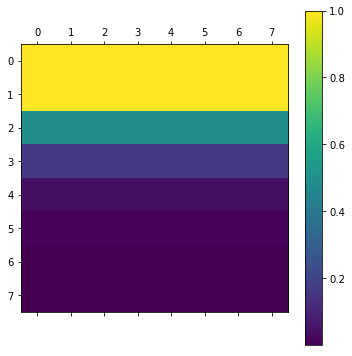

In [16]:
plt.matshow(M.T)
plt.colorbar()
plt.show()

In [17]:
A = M * V

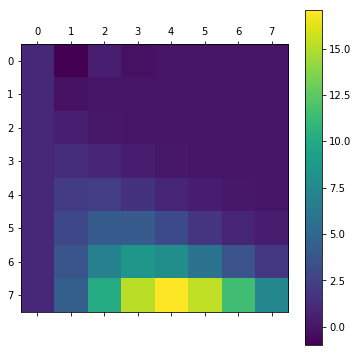

In [18]:
plt.matshow(A)
plt.colorbar()
plt.show()

In [19]:
c = np.dot(np.linalg.inv(A.T), b)

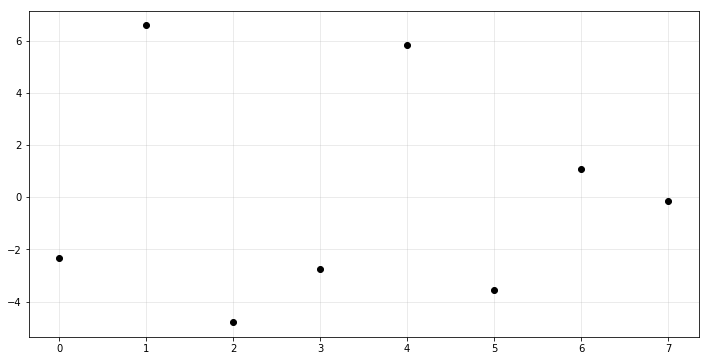

In [20]:
plt.plot(c, 'ko')
plt.grid(alpha=0.3)
plt.show()

In [21]:
np.dot(c.T, y(stencil))

-0.552379609323169

As we can see the solution is very close to desirable.

We can now enclose the whole process into single funcion:

In [34]:
def all_powerful_finite_differences(func, x, k, stencil_x):
    """
    func - function which derivative should be approximated.
    x - point at which the derivative will be calculated.
    k - order of the derivative
    stencil_x - points of the domain at which the value of function is known.
    """
    # Apropriate Vandermonde's matrix 
    vander_mat = np.vander(stencil_x - x, len(stencil_x), increasing=True)
    print(f"Condition number of the Vandermonde's matrix: {np.linalg.cond(vander_mat)}")
    # Factorials matrix
    factorials_mat = np.array([scipy.special.factorial(np.arange(len(stencil_x))) for _ in range(len(stencil_x))])
    # Derivatives vector
    derivatives_vec = np.zeros(len(stencil_x))
    derivatives_vec[k] = 1
    # Calculate necessary matrix
    tmp = (1 / factorials_mat) * vander_mat
    # Obtain the coefficients
    coeffs = np.dot(np.linalg.inv(tmp).T, derivatives_vec)
    return np.dot(coeffs, func(stencil_x))

We can now calculate some example derivatives:

1. $y(x) = 3 x ^ 2$, $y^{(3)}(x) = 0$. Around point $x = 1$.

In [35]:
all_powerful_finite_differences(lambda x: 3 * x ** 2, 1, 3, stencil)

Condition number of the Vandermonde's matrix: 1.4605928973679892e+18


0.006817054651037324

2. $y(x) = \sin(x)$, $y^{(5)}(x) = \cos(x)$. Around point $x = 1$.

In [36]:
stencil = np.linspace(0 , 2 * np.pi, 20)

In [37]:
np.cos(1)

0.5403023058681398

In [38]:
all_powerful_finite_differences(np.sin, 1, 5, stencil)

Condition number of the Vandermonde's matrix: 1.4605928973679892e+18


0.5404796590883052

# Forward Euler Method

Write and idiot-proof code for forward Euler method. Design what your routing should take as input and output. Avoid unnecessary loops and aim for performance.

Given an equation
$$
y'(t) = f(t, y(t)) \text{,} \quad y(t_0) = y_0
$$
Euler method computes the approximation in following way
$$
y_{n+1} = y_n + hf(t_n, y_n)
$$
where $t_n = t_0 + nh$.

In [120]:
def forward_euler(func, domain, y0):
    values = [y0]
    h = domain[1] - domain[0]
    for point in domain[1:]:
        values.append(values[-1] + h * func(point, values[-1]))
    return np.array(values)

In [121]:
def func(x, y=None):
    return x ** 2 / 6 + x * y(x)

In [112]:
y = lambda x: np.sin(x)

In [117]:
x = np.linspace(0, 2 * np.pi)

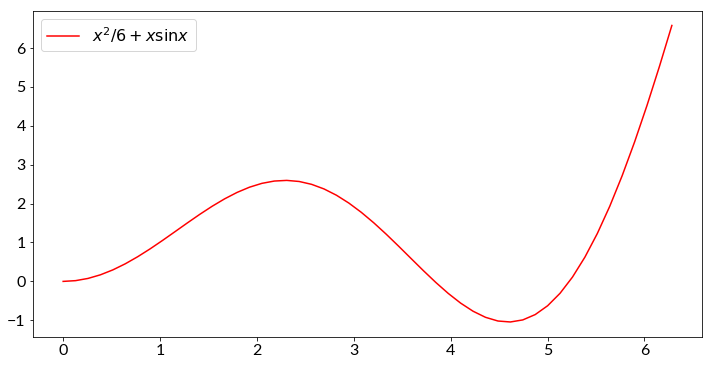

In [118]:
plt.plot(x, func(x, y), color='r', label=r'$x^2/6 + x\sin x$')
plt.legend()
plt.show()

In [119]:
solution = forward_euler(func, x, 0)

TypeError: 'int' object is not callable

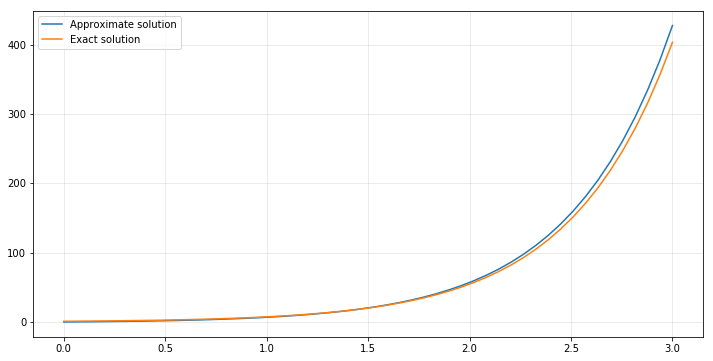

In [75]:
plt.plot(x, solution, label="Approximate solution")
plt.plot(x, np.exp(2* x), label="Exact solution")
plt.grid(alpha=0.3)
plt.legend()
plt.show()